In [49]:
# importing the dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [50]:
# importing the dataset
df=pd.read_csv(r'F:\courses\data set\math score\exams.csv')

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [53]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [54]:
# checking the number of NaN values in the attributes
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Text(0, 0.5, 'Test Score')

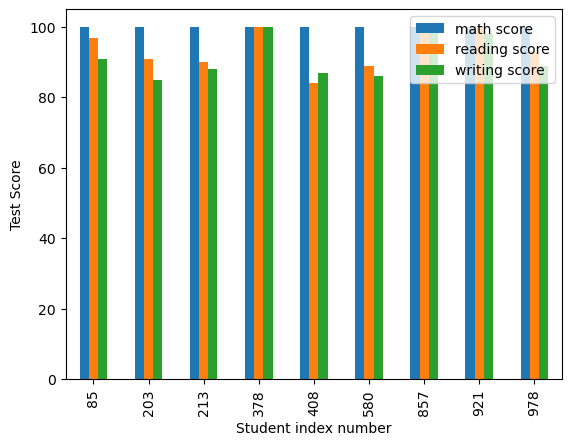

In [55]:
# finding students with math score =100
df[df['math score']==100].plot(kind='bar')
plt.xlabel('Student index number')
plt.ylabel('Test Score')

In [56]:
# dropping unncessary columns
df=df.drop(['gender','race/ethnicity','lunch'],axis=1)

In [57]:
df

,parental level of education,test preparation course,math score,reading score,writing score
0,some college,completed,59,70,78
1,associate's degree,none,96,93,87
2,some college,none,57,76,77
3,some college,none,70,70,63
4,associate's degree,none,83,85,86
...,...,...,...,...,...
995,some college,none,77,77,71
996,some college,none,80,66,66
997,high school,completed,67,86,86
998,high school,none,80,72,62


In [58]:
# making dummies of the parental level education column and test preparation course to prepare the dataset for training 
new_cat=['parental level of education','test preparation course']
new_df=pd.get_dummies(df,columns=new_cat)

In [59]:
new_df

,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,59,70,78,0,0,0,0,1,0,1,0
1,96,93,87,1,0,0,0,0,0,0,1
2,57,76,77,0,0,0,0,1,0,0,1
3,70,70,63,0,0,0,0,1,0,0,1
4,83,85,86,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,77,77,71,0,0,0,0,1,0,0,1
996,80,66,66,0,0,0,0,1,0,0,1
997,67,86,86,0,0,1,0,0,0,1,0
998,80,72,62,0,0,1,0,0,0,0,1


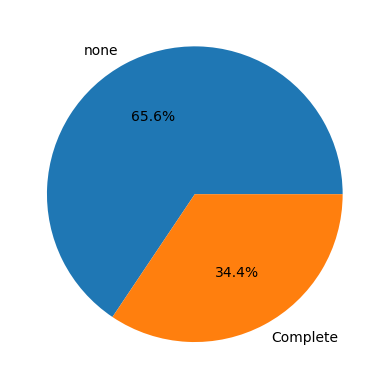

In [60]:
# number of students who completed preparation of test
data=np.array(df['test preparation course'].value_counts())
label=['none','Complete']
plt.pie(data,labels=label,autopct='%1.1f%%')
plt.show()

Text(0, 0.5, 'Number of student')

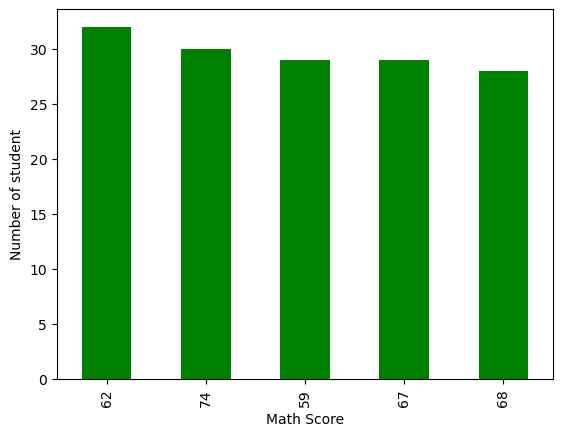

In [61]:
# top 5 math score in class
df['math score'].value_counts().head().plot(kind='bar',color='green')
plt.xlabel('Math Score')
plt.ylabel('Number of student')

Text(0, 0.5, 'Number of student')

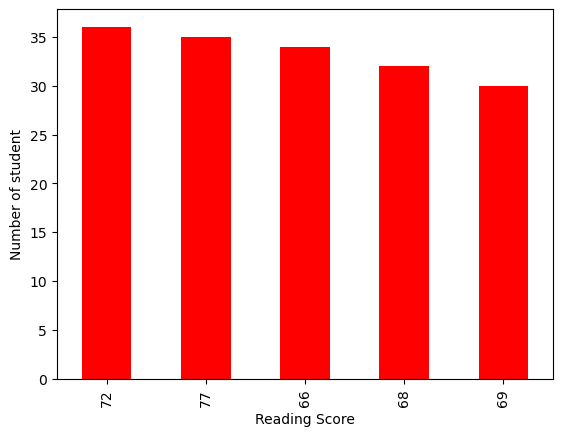

In [62]:
df['reading score'].value_counts().head().plot(kind='bar',color='red')
plt.xlabel('Reading Score')
plt.ylabel('Number of student')

Text(0, 0.5, 'Number of student')

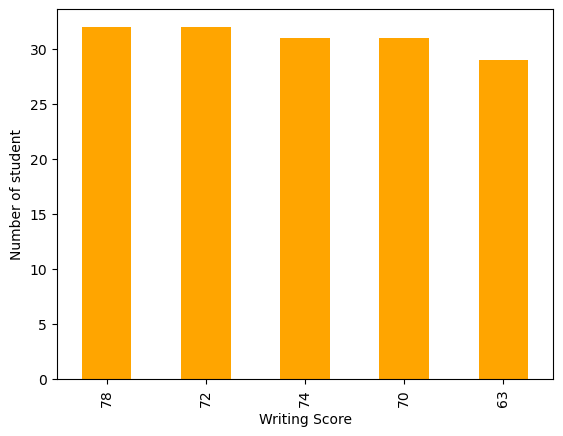

In [63]:
df['writing score'].value_counts().head().plot(kind='bar',color='orange')
plt.xlabel('Writing Score')
plt.ylabel('Number of student')

# Preparing the dataset

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
x=new_df.drop(['math score'],axis=1)
y=new_df['math score']

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

# Training the model

In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
lr=LinearRegression()

In [275]:
x_train.shape

(800, 10)

In [276]:
y_train.shape

(800,)

In [277]:
lr.fit(x_train,y_train)

LinearRegression()

# Predicting the model

In [278]:
y_pred=lr.predict(x_test)

# Evaluating the Trained model

In [279]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [280]:
r2_score(y_test,y_pred)

0.6812589825299642

In [281]:
mean_absolute_error(y_test,y_pred)

7.318642477267136

In [282]:
mean_squared_error(y_test,y_pred)

75.92015797274593

Mean Squared error provided the better evaluation 